In [136]:
import pandas as pd
import glob
import re
import scipy.stats as ss

In [137]:
fns = glob.glob('/data/odc/derivatives/laminar_analysis/sub-*/ses-*/func/sub-*_ses-*_desc-psc.pkl')

In [138]:
reg = re.compile(r'.*/sub-(?P<subject>[a-z]+)_ses-(?P<session>[a-z0-9]+)_desc-psc\.pkl')

In [139]:
results = []

for fn in fns:
    
    meta = reg.match(fn).groupdict()
    print(meta)
    
    df = pd.read_pickle(fn)
    t, p = ss.ttest_ind(df.loc[(slice(None), 'left', slice(None)), :], df.loc[(slice(None), 'right', slice(None)), :], axis=0)
    df.columns = pd.MultiIndex.from_arrays([df.columns.get_level_values(ix).values for ix in df.columns.names] + [t], names=df.columns.names + ['t'])
    dfm = df.reset_index().melt(id_vars=df.index.names, value_name='psc')
    
    dfm['layer'] = (dfm['depth'] * 6).astype(int) + 1

    dfm.loc[dfm['t'] > dfm['t'].quantile(.9), 'type'] = 'left'
    dfm.loc[dfm['t'] < dfm['t'].quantile(.1), 'type'] = 'right'

    dfm.loc[(dfm['type'] == dfm['condition']) & (~dfm['type'].isnull()), 'stimulated'] = True
    dfm.loc[(dfm['type'] != dfm['condition']) & (~dfm['type'].isnull()), 'stimulated'] = False
    
    results.append(dfm.groupby(['mask', 'layer', 'type', 'condition', 'stimulated', 'task']).mean())

{'subject': 'bm', 'session': 'odc'}


/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


{'subject': 'eo', 'session': 'odc'}


/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


{'subject': 'ms', 'session': 'odc2'}


/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


{'subject': 'ns', 'session': 'odc'}


/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


{'subject': 'tk', 'session': 'odc2'}


/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


{'subject': 'tk', 'session': 'odc3'}


/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


{'subject': 'tr', 'session': 'odc'}


/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [140]:
dfm.loc[dfm['t'].abs() > 3]['psc'].quantile([.1, .3, .5, .7, .9])

0.1     3.220019
0.3    15.597849
0.5    26.319953
0.7    40.428236
0.9    62.242088
Name: psc, dtype: float64

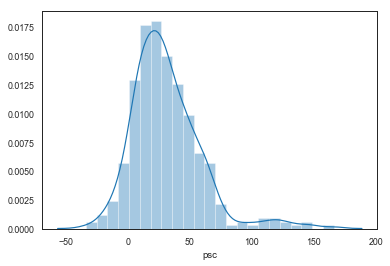

In [141]:
sns.distplot(dfm.loc[dfm['t'].abs() > 3]['psc'])

In [142]:
results = pd.concat(results, axis=0, 
          keys=[(d['subject'], d['session']) for d in [reg.match(fn).groupdict() for fn in fns]],
          names=['subject', 'session'])

In [144]:
import seaborn as sns

In [145]:
results_ = results.reset_index()

results_['stimulated'] = results_.stimulated.map({True:'Stimulated columns', False: 'Unstimulated columns'})

results_['% signal change'] = results_['psc']

results_['mask'] = results_['mask'].map({'V1l': 'Left V1', 'V1r':'Right V1'})

results_['Layer (higher is closer to pial surface)'] = results_['layer']

In [146]:
sns.set_context('paper')
sns.set_style('white')

In [147]:
import matplotlib.pyplot as plt

/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


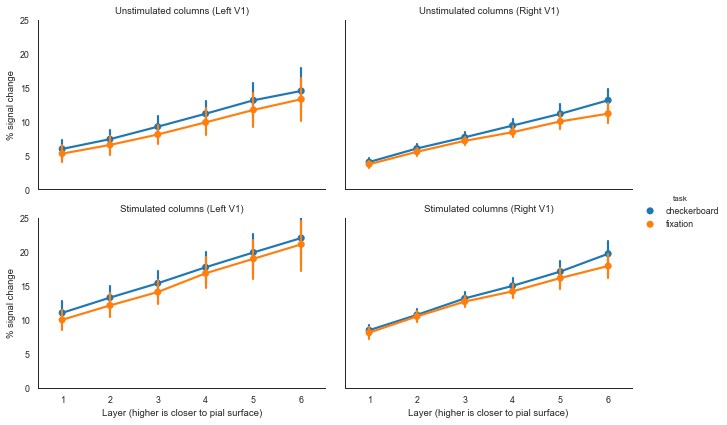

In [148]:
fac = sns.catplot('Layer (higher is closer to pial surface)', '% signal change', 'task', 
            col='mask',  row='stimulated', data=results_, kind='point', ci=67, aspect=1.5, size=3,
                 row_order=['Unstimulated columns', 'Stimulated columns'])


fac.set_titles("{row_name} ({col_name})")  # use this argument literally

fac.set(ylim=(0, 25))

plt.savefig('/data/odc/figures/psc_laminar.pdf', transparent=True)

/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter

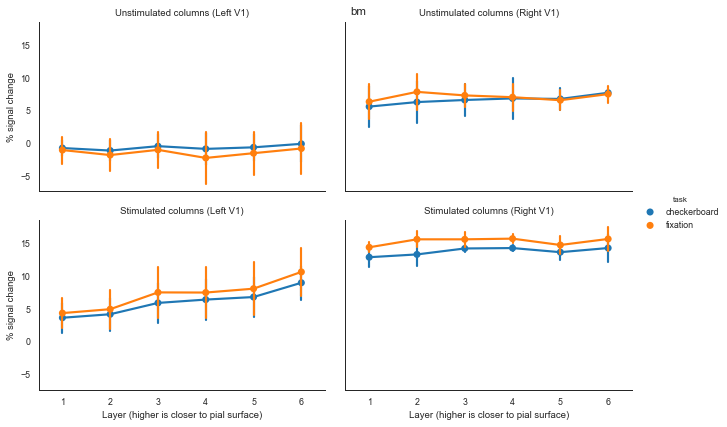

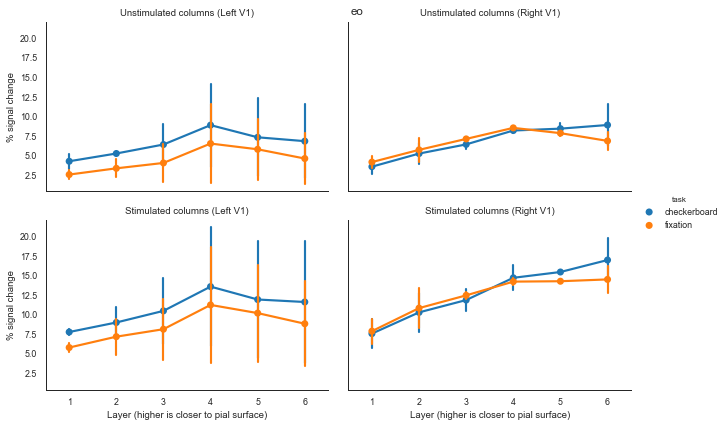

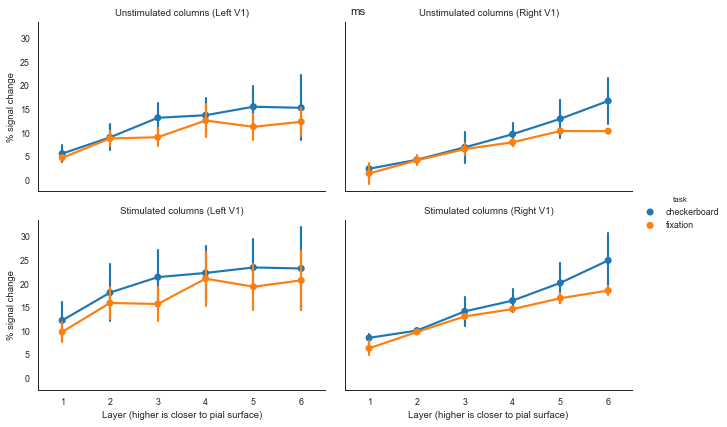

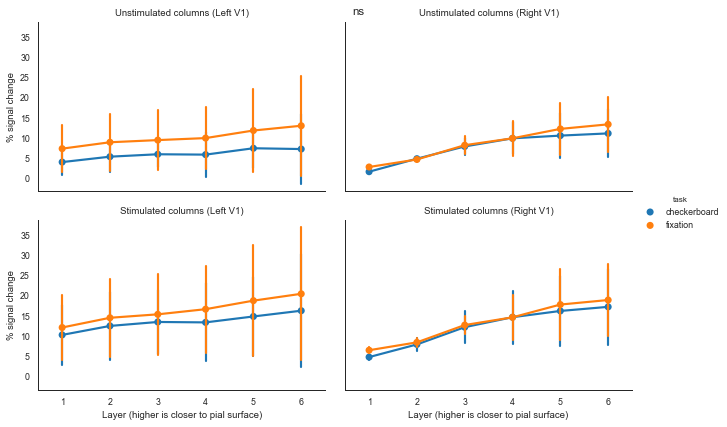

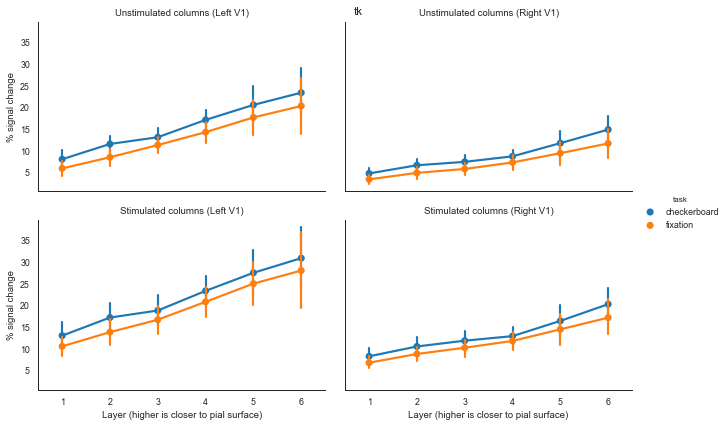

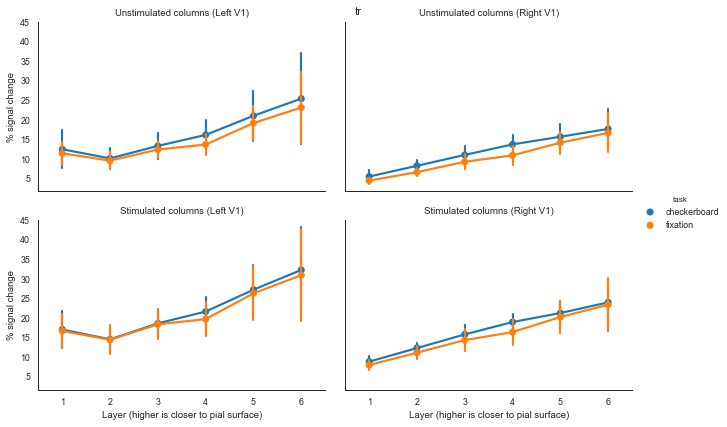

In [149]:
for subject, d in results_.groupby(['subject']):

    fac = sns.catplot('Layer (higher is closer to pial surface)', '% signal change', 'task', 
                col='mask',  row='stimulated', data=d, kind='point', ci=67, aspect=1.5, size=3,
                     row_order=['Unstimulated columns', 'Stimulated columns'])


    fac.set_titles("{row_name} ({col_name})")  # use this argument literally

#     fac.set(ylim=(0, 25))

#     plt.savefig('/data/odc/figures/psc_laminar.pdf', transparent=True)

    plt.suptitle(subject)